In [ ]:
import pydeck as pdk

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [1]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
penguin_df = pd.read_csv("./data/penguins.csv")
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:

penguin_df.dropna(inplace=True)
output = penguin_df["species"]
features = penguin_df[
    [
        "island",
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
        "sex",
    ]
]

In [5]:
features

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,male
1,Torgersen,39.5,17.4,186.0,3800.0,female
2,Torgersen,40.3,18.0,195.0,3250.0,female
4,Torgersen,36.7,19.3,193.0,3450.0,female
5,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...
339,Dream,55.8,19.8,207.0,4000.0,male
340,Dream,43.5,18.1,202.0,3400.0,female
341,Dream,49.6,18.2,193.0,3775.0,male
342,Dream,50.8,19.0,210.0,4100.0,male


In [4]:
output

0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 333, dtype: object

In [6]:
features = pd.get_dummies(features)
output, uniques = pd.factorize(output)

In [7]:
features 

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,False,True,False,False,True


In [8]:
output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, output, test_size=0.8)

In [10]:
x_train

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
253,55.9,17.0,228.0,5600.0,True,False,False,False,True
338,45.7,17.0,195.0,3650.0,False,True,False,True,False
247,50.8,15.7,226.0,5200.0,True,False,False,False,True
182,47.3,15.3,222.0,5250.0,True,False,False,False,True
238,43.4,14.4,218.0,4600.0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
307,54.2,20.8,201.0,4300.0,False,True,False,False,True
64,36.4,17.1,184.0,2850.0,True,False,False,True,False
319,45.5,17.0,196.0,3500.0,False,True,False,True,False
337,46.8,16.5,189.0,3650.0,False,True,False,True,False


In [11]:
x_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
23,38.2,18.1,185.0,3950.0,True,False,False,False,True
310,49.7,18.6,195.0,3600.0,False,True,False,False,True
30,39.5,16.7,178.0,3250.0,False,True,False,True,False
169,49.2,15.2,221.0,6300.0,True,False,False,False,True
211,50.4,15.3,224.0,5550.0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...
85,41.3,20.3,194.0,3550.0,False,True,False,False,True
13,38.6,21.2,191.0,3800.0,False,False,True,False,True
304,46.4,17.8,191.0,3700.0,False,True,False,True,False
82,36.7,18.8,187.0,3800.0,False,False,True,True,False


In [12]:
rfc = RandomForestClassifier(random_state=15)

# Se entrena el modelo
rfc.fit(x_train.values, y_train)

# forecast
y_pred = rfc.predict(x_test.values)

# Evaluar
score = accuracy_score(y_pred, y_test)
print("Our accuracy score for this model is {}".format(score))

Our accuracy score for this model is 0.9700374531835206


In [13]:
# Guarda el modelo 
rf_pickle = open("random_forest_penguin.pickle", "wb")
pickle.dump(rfc, rf_pickle)
rf_pickle.close()

# Guarda el modelo
output_pickle = open("output_penguin.pickle", "wb")
pickle.dump(uniques, output_pickle)
output_pickle.close()

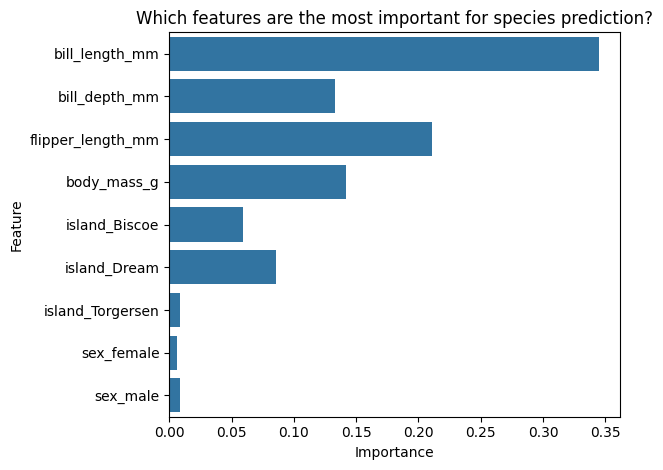

In [14]:
fig, ax = plt.subplots()

ax = sns.barplot(x=rfc.feature_importances_, y=features.columns)
plt.title("Which features are the most important for species prediction?")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
fig.savefig("feature_importance.png")
#plt.show()

In [ ]:
# Cargamos los datos
penguin_df = pd.read_csv("./data/penguins.csv")

rf_pickle = open('random_forest_penguin.pickle', 'rb')
map_pickle = open('output_penguin.pickle', 'rb')
rfc = pickle.load(rf_pickle)

unique_penguin_mapping = pickle.load(map_pickle) 
rf_pickle.close()
map_pickle.close()

st.title('Penguin Classifier')
st.write("This app uses 6 inputs to predict the species of penguin using"
         "a model built on the Palmer's Penguin's dataset. Usethe form below" " to get started!")